### *Marta Solarz* ###

# Projekt nr 1 (Równania rózniczkowe zwyczajne) - deadline: 7.05.2022 #

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure',figsize=(16,9))
plt.rc('font', size=15)

## Zadania: ##
#### Zadanie LP1.1.  ####
Wykonaj wykres 17. pochodnej funkcji $f(x):=(x^2 + x)\exp(x)$ na przedziale $[−1, 1]$. 


In [3]:
# Szukamy 17 pochodnej funkcji f(x)

x = sp.symbols('x')
f = (pow(x,2)+x)*sp.exp(x)

pochodne = []

for i in range(18):  # obliczamy 17 kolejnych pochodnych
    f = sp.diff(f,x)
    pochodne.append(f)
    
g = pochodne[16]  # szukana 17-ta pochodna

sol = sp.simplify(g) # upraszamy postać funkcji
sol 

(x**2 + 35*x + 289)*exp(x)

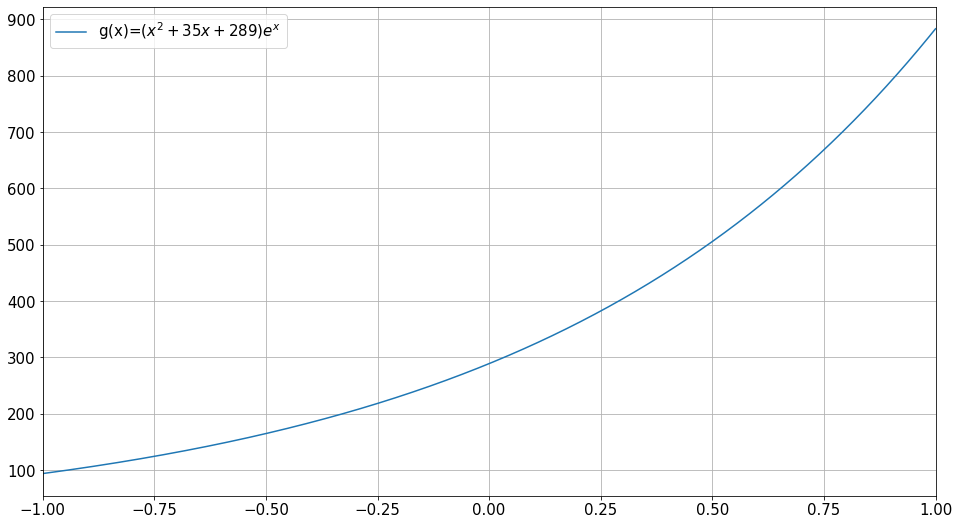

In [4]:
# Rysujemy wykres

x = np.linspace(-1, 1, 1000)
y = (pow(x,2)+35*x+289)*np.exp(x)

plt.plot(x,y, label="g(x)="+"$%s$"%sp.latex(sol)) 
plt.legend()
plt.xlim([-1,1])
plt.grid()

#### Zadanie LP1.2. ####
Wykonaj wykres rozwiązań równań:

a) $\dot{x}=\exp(2t-x)$;

b) $\dot{x}=-\sqrt{3}t^2+2x$;

c) $\dot{x}=\frac{\frac{t}{20}+x}{x-t}$;

przechodzących przez punkt (1, 2) na przedziale $t ∈ [0.5, 2.5]$. 


In [5]:
# Ad.a 
# Szukamy rozwiązania ogólnego równania a

t = sp.symbols('t')
x = sp.Function('x')

eq_a = sp.Eq(
    sp.Derivative(x(t),t),
    sp.exp(2*t-x(t)))

solution_a = sp.dsolve(eq_a)
solution_a

Eq(x(t), log(C1 + exp(2*t)/2))

In [6]:
# Szukamy rozwiązania szczególnego równania a, przechodzącego przez punkt (1,2)

sol_Cauchy_a = sp.dsolve(eq_a, x(t), ics={x(1):2})
sol_Cauchy_a

Eq(x(t), log(exp(2*t)/2 + exp(2)/2))

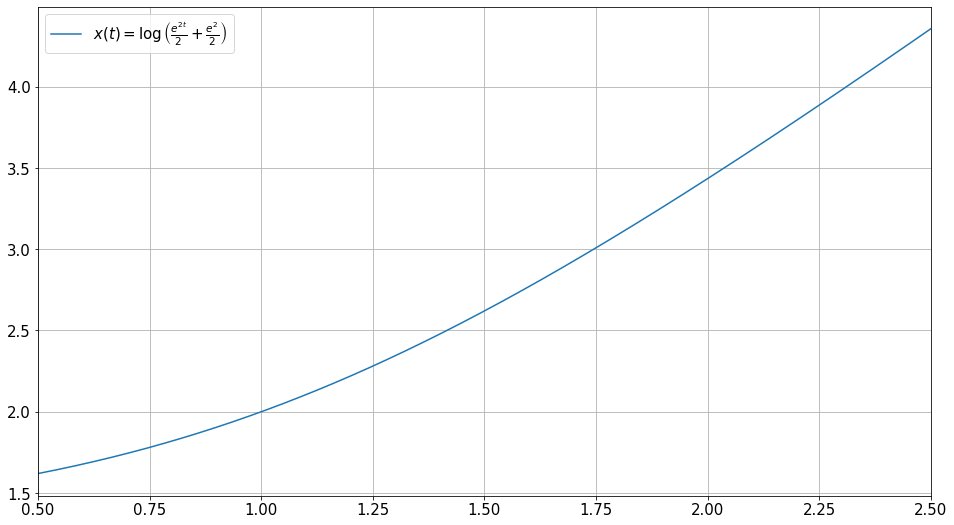

In [7]:
# Rysujemy wykres rozwiązania szczególnego równania a, przechodzącego przez punkt (1,2)

t = np.linspace(0.5, 2.5, 1000)
x = np.log(np.exp(2*t)/2+np.exp(2)/2)

plt.plot(t,x, label="$%s$"%sp.latex(sol_Cauchy_a)) 
plt.legend()
plt.xlim([0.5,2.5])
plt.grid()

In [8]:
# Ad.b
# Szukamy rozwiązania ogólnego równania b

t = sp.symbols('t')
x = sp.Function('x')

eq_b = sp.Eq(
    sp.Derivative(x(t),t),
    -sp.sqrt(3)*t**2+2*x(t))

solution_b = sp.dsolve(eq_b)
solution_b

Eq(x(t), C1*exp(2*t) + sqrt(3)*t**2/2 + sqrt(3)*t/2 + sqrt(3)/4)

In [9]:
# Szukamy rozwiązania szczególnego równania b, przechodzącego przez punkt (1,2)

sol_Cauchy_b = sp.dsolve(eq_b, x(t), ics={x(1):2})
sol_Cauchy_b_simplify = sp.simplify(sol_Cauchy_b)  # upraszaczamy postać rozwiązania
sol_Cauchy_b_simplify

Eq(x(t), (sqrt(3)*(2*t**2 + 2*t + 1)*exp(2) + (8 - 5*sqrt(3))*exp(2*t))*exp(-2)/4)

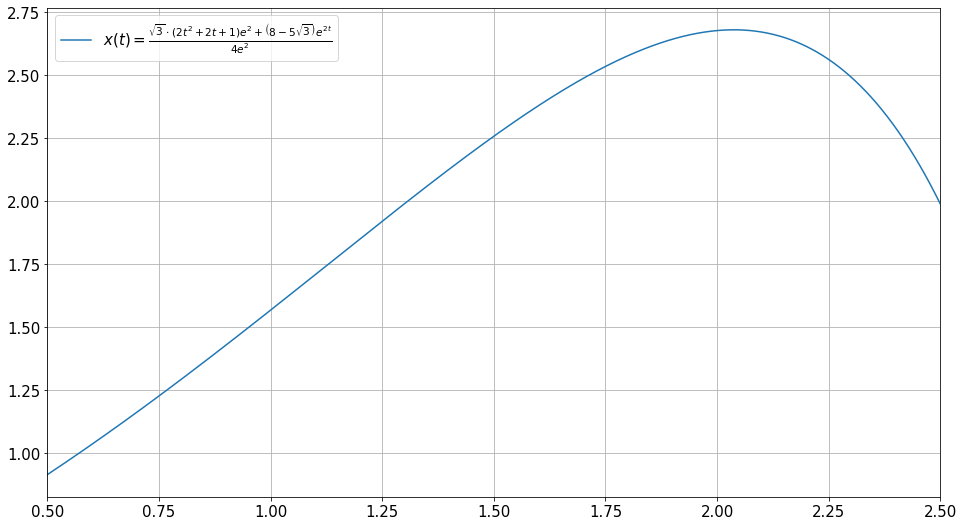

In [10]:
# Rysujemy wykres rozwiązania szczególnego równania b, przechodzącego przez punkt (1,2)

t = np.linspace(0.5, 2.5, 1000)
x = (np.sqrt(3)*(t**2+2*t+1)*np.exp(2)+(8-5*np.sqrt(3))*np.exp(2*t))/(4*np.exp(2))

plt.plot(t,x, label="$%s$"%sp.latex(sol_Cauchy_b_simplify)) 
plt.legend()
plt.xlim([0.5,2.5])
plt.grid()

In [11]:
# Ad.c
# Szukamy rozwiązania ogólnego równania c

t = sp.symbols('t')
x = sp.Function('x')

eq_c = sp.Eq(
    sp.Derivative(x(t),t),
    (t/20+x(t))/(x(t)-t))

solution_c = sp.dsolve(eq_c)
solution_c

[Eq(x(t), t - sqrt(C1 + 105*t**2)/10), Eq(x(t), t + sqrt(C1 + 105*t**2)/10)]

Mamy zatem dwa rozwiązania ogólne tego równania.

In [12]:
# Rozwiązania ogólne równania c mają postać:

solution_c_1 = sp.simplify(solution_c[1])
solution_c_2 = sp.simplify(solution_c[0])

In [13]:
solution_c_1

Eq(x(t), t + sqrt(C1 + 105*t**2)/10)

In [14]:
solution_c_2

Eq(x(t), t - sqrt(C1 + 105*t**2)/10)

In [15]:
# Szukamy rozwiązań szczególnych równania c, przechodzących przez punkt (1,2)
# Wyliczamy ile wynosi stała C_1 w rozwiązaniu pierwszym:

C_1 = sp.symbols('C_1')

sol = sp.solve(1+(sp.sqrt(C_1+105*1**2))/10-2, C_1)
print('C_1 =',sol)

C_1 = [-5]


In [16]:
# Wyliczamy ile wynosi stała C_1 w rozwiązaniu drugim:

C_1 = sp.symbols('C_1')

sol = sp.solve(1-(sp.sqrt(C_1+105*1**2))/10-2, C_1)
print('C_1 =',sol)

C_1 = []


Zatem równanie c) ma dwa rozwiązania ogólne, ale tylko jedno szczególne przechodzące przez punkt (1,2):

$x_1(t)=t+\frac{(\sqrt{-5+105t^2})}{10}$.

In [17]:
sol_Cauchy_c = t+(sp.sqrt(-5+105*t**2))/10
sol_Cauchy_c

t + sqrt(105*t**2 - 5)/10

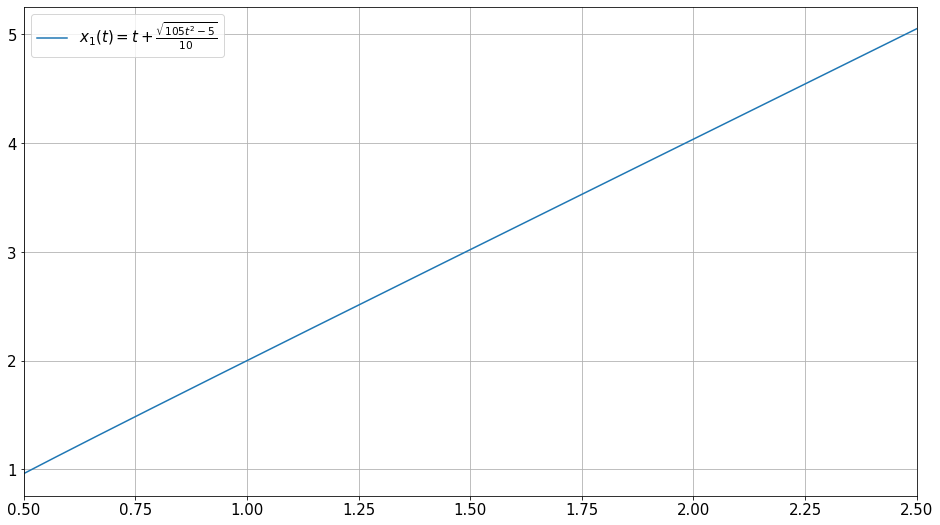

In [18]:
# Rysujemy wykres rozwiązania szczególnego równania c, przechodzącego przez punkt (1,2)

t = np.linspace(0.5, 2.5, 1000)
x = (t+(np.sqrt(-5+105*t**2))/10)

plt.plot(t,x, label="$x_1(t)=$$%s$"%sp.latex(sol_Cauchy_c)) 
plt.legend()
plt.xlim([0.5,2.5])
plt.grid()